## Movie Genres Analysis

#### Research Questions and Hypotheses

Research Questions:

- Which genres are the most common (number of movies made)?
- Which genres have high avg. budget and revenue?
- Which genres have high avg. profit?
- Which genres have high avg. popularity?
- Which genres have highest number of movies with a voting avg >= 8?

Research Hypotheses:

- The best movies according to vote avg. return the highest profit and revenue.
- The best movies according to popularity return the highest profit and revenue.
- Highly budgeted movies return high profit.
- Highly budgeted movies have high popularity.
- Movies have made more profit over time (based on genre).

In [166]:
# import necessary libraries
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
# read in the data file 'imdb_movies.csv'
movies = pd.read_csv(
    r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Movie-Genres-Analysis\Resources\imdb_movies.csv')

# display the first rows of the data for exploration
pd.set_option('display.max.columns', 25)
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


### Data Exploration and Cleaning

In [168]:
# explore data types and dataframe info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [169]:
# check for duplicates
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000000,2010,30000000.000000,967000.000000


In [170]:
# one duplicate row to be dropped
movies.drop_duplicates(inplace = True)

In [171]:
# remove rows with null values for the 'genres' column
movies.dropna(subset = ['genres'], inplace = True)

In [172]:
# create a column for 'profit' based on the movies' revenue and budget
movies['profit'] = movies['revenue'] - movies['budget']

In [173]:
# remove unnecessary columns, assign it as a new dataframe called 'movies_genre'
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [174]:
# clean the genres column, split it by the '|' character and stack based on the index (creates multi-level index)
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [175]:
# remove the newly created multi-level index, and rename the series
split.index = split.index.droplevel(-1)
split.name = 'genres_split'

# delete the 'genres' column from the working dataframe and replace it with the newly created series 'genres_split'.
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


###  Research Question: 
         Which genres are the most common (number of movies made)?

In [176]:
# creates a new database with the unique genres as the index and their respective counts as a column of data
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies per Genre in %'}, ylabel='original_title'>

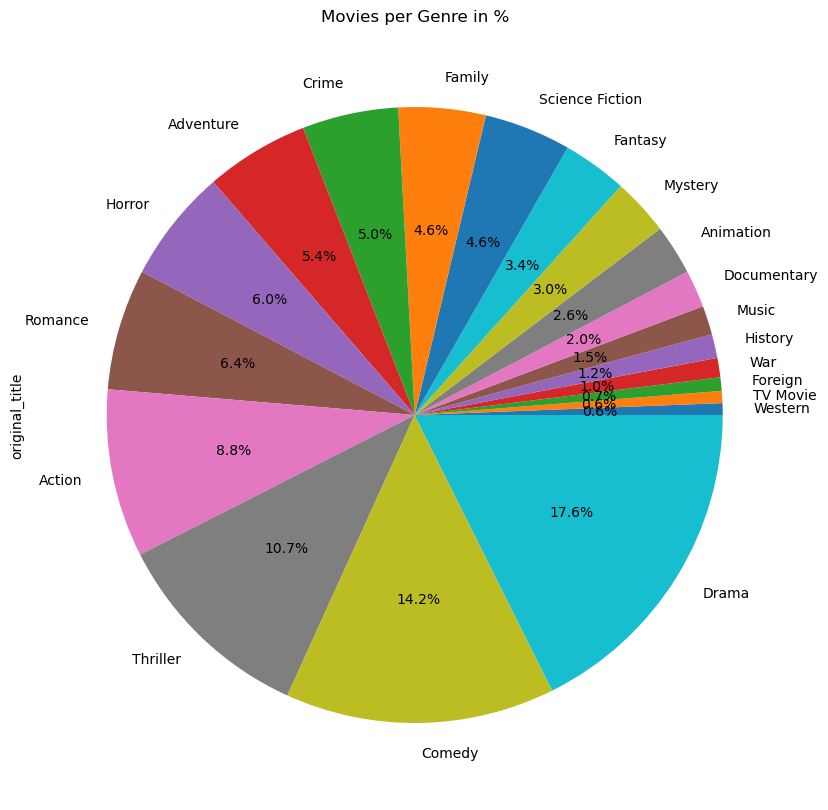

In [177]:
# Creates a pie chart to display the numbers of movies in each genre by percentage 
genres_count['original_title'].plot.pie(title = 'Movies per Genre in %', autopct = '%1.1f%%', figsize = (10, 10))

<Axes: title={'center': 'Movies per Genre'}, ylabel='genres_split'>

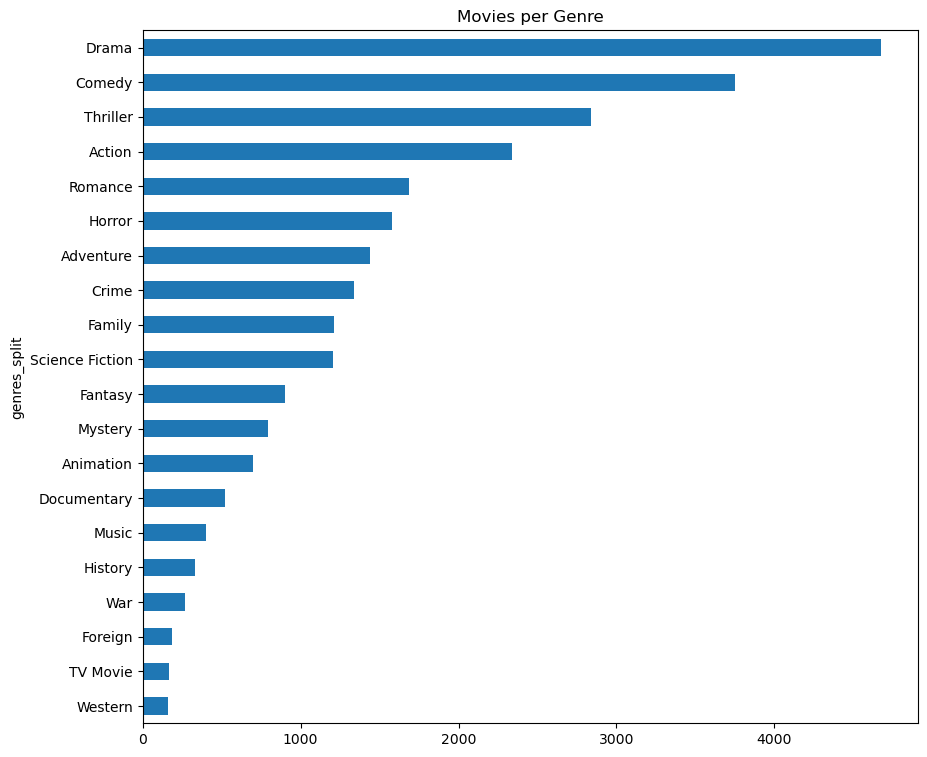

In [178]:
# Creates a bar chart to display the numbers of movies in each genre 
genres_count['original_title'].plot.barh(title = 'Movies per Genre', figsize = (10, 9))

###  Research Question: 
         Which genres have high avg. budget and revenue??

In [179]:
# creates a new database with the unique genres as the index and their respective counts as a column of data
genres_average = movies_genre.groupby('genres_split').mean(numeric_only = True)

# change the dataframe values from scientific notation to a float
pd.options.display.float_format = '{:2f}'.format

# sort the dataframe based on the 'revenue' column
genres_average.sort_values('revenue', ascending = True, inplace = True)

genres_average

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


<Axes: title={'center': 'Average Revenue and Budget by Genre'}, ylabel='genres_split'>

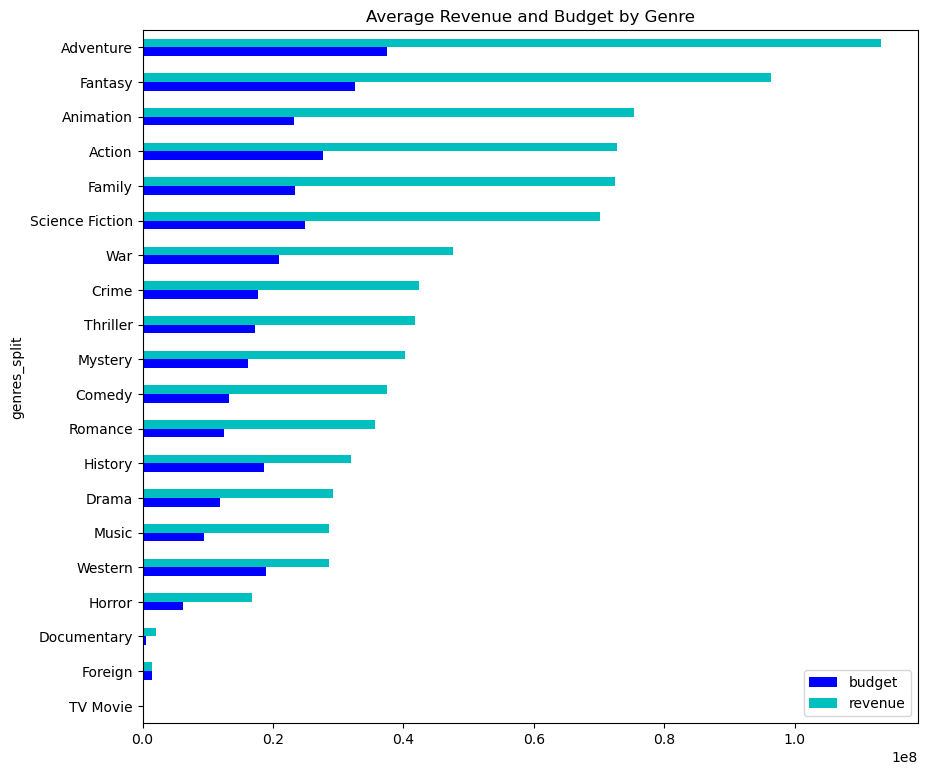

In [180]:
# Creates a bar chart to display the genres with respect to their average revenue and budget
genres_average[['budget', 'revenue']].plot.barh(title = 'Average Revenue and Budget by Genre', color = ('blue', 'c'), figsize = (10, 9))

###  Research Question: 
         Which genres have high avg. profit?

In [181]:
# sort the dataframe based on the 'profit' column
genres_average.sort_values('profit', ascending = True, inplace = True)

genres_average

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


<Axes: title={'center': 'Average Profit by Genre'}, ylabel='genres_split'>

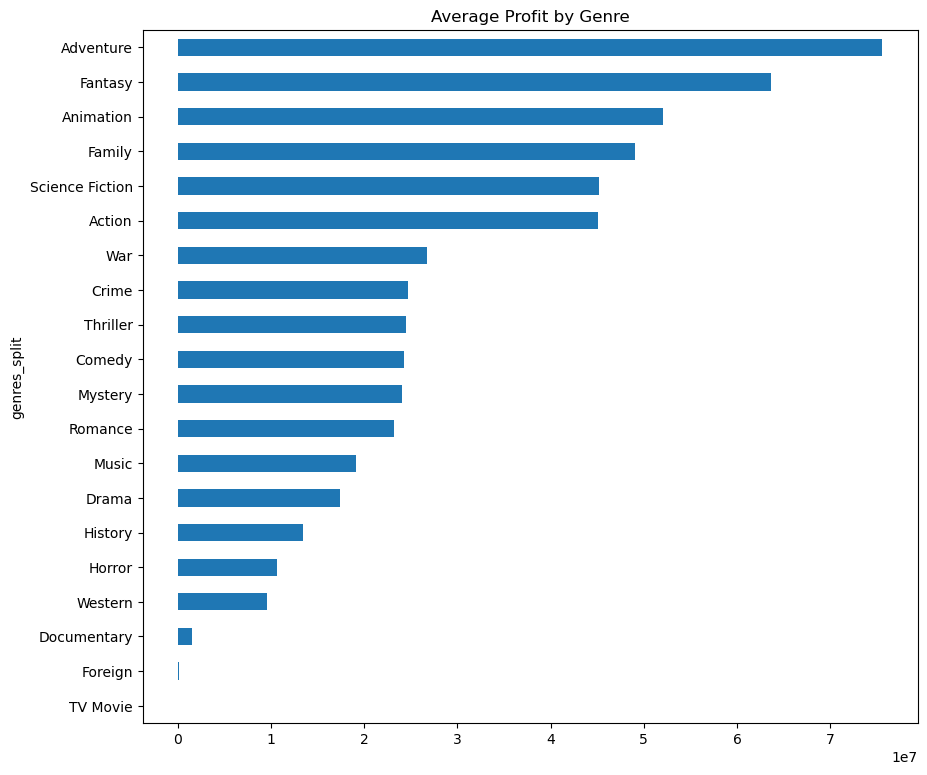

In [182]:
# Creates a bar chart to display the genres with respect to their average profit
genres_average['profit'].plot.barh(title = 'Average Profit by Genre', figsize = (10, 9))

###  Research Question: 
         Which genres have high avg. popularity?

In [183]:
# sort the dataframe based on the 'popularity' column
genres_average.sort_values('popularity', ascending = True, inplace = True)

genres_average

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


<Axes: title={'center': 'Average Popularity by Genre'}, ylabel='genres_split'>

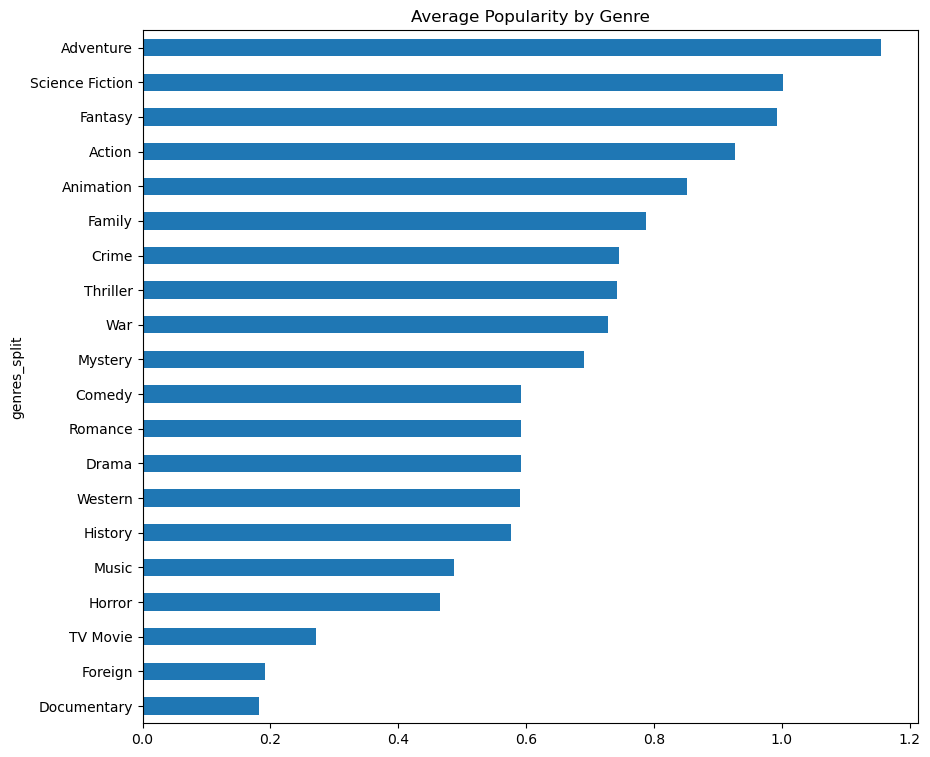

In [184]:
# Creates a bar chart to display the genres with respect to their average popularity rating
genres_average['popularity'].plot.barh(title = 'Average Popularity by Genre', figsize = (10, 9))

###  Research Question: 
         Which genres have highest number of movies with a voting avg >= 8?

In [185]:
# use previous table 'movies_genre'
# Filter down to movies that have at least 50 votes for an average rating of 8 or higher
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_fifty

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,2015,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,2015,1520,8.000000,29401758,Thriller
...,...,...,...,...,...,...,...,...,...,...
10141,2.610362,806948,32000000,Psycho,109,1960,1180,8.000000,31193052,Horror
10141,2.610362,806948,32000000,Psycho,109,1960,1180,8.000000,31193052,Thriller
10222,2.377288,22000000,321265768,Schindler's List,195,1993,2632,8.100000,299265768,Drama
10222,2.377288,22000000,321265768,Schindler's List,195,1993,2632,8.100000,299265768,History


In [186]:
# Filter down to movies that havean average rating of 8 or higher regardless of number of votes
vote_none = movies_genre[movies_genre['vote_average'] >= 8]
vote_none

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,2015,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,2015,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,2015,1520,8.000000,29401758,Thriller
...,...,...,...,...,...,...,...,...,...,...
10222,2.377288,22000000,321265768,Schindler's List,195,1993,2632,8.100000,299265768,War
10575,0.195770,0,0,MacskafogÃ³,96,1986,12,8.000000,0,Animation
10575,0.195770,0,0,MacskafogÃ³,96,1986,12,8.000000,0,Family
10817,0.064029,0,321952,The Last Waltz,117,1978,33,8.000000,321952,Documentary


In [187]:
# creates a new database for the number of movies with an average rating of 8 of higher and with at least 50 votes
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Highly Rated Movies by Genre (min. 50 votes)'}, ylabel='genres_split'>

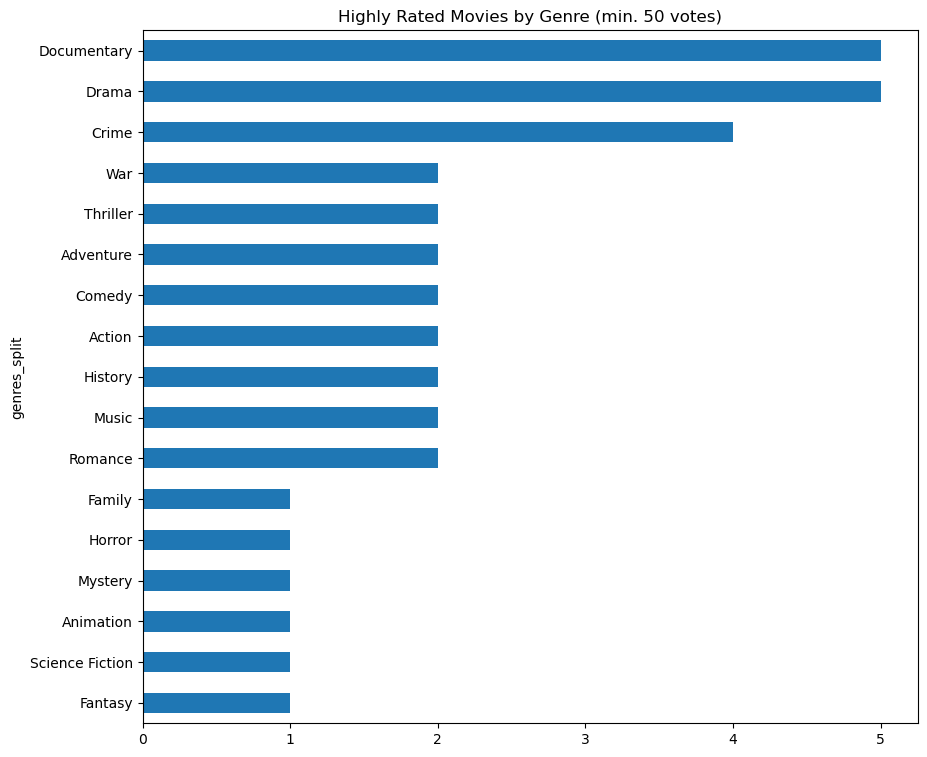

In [188]:
# Creates a bar chart to display the movies per genres with a rating of 8 or higher and with at least 50 votes
genres_vote['vote_average'].plot.barh(title = 'Highly Rated Movies by Genre (min. 50 votes)', figsize = (10, 9))

In [189]:
# creates a new database for the number of movies with an average rating of 8 of higher regardless of the number of votes
genres_vote = pd.DataFrame(vote_none.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Highly Rated Movies by Genre'}, ylabel='genres_split'>

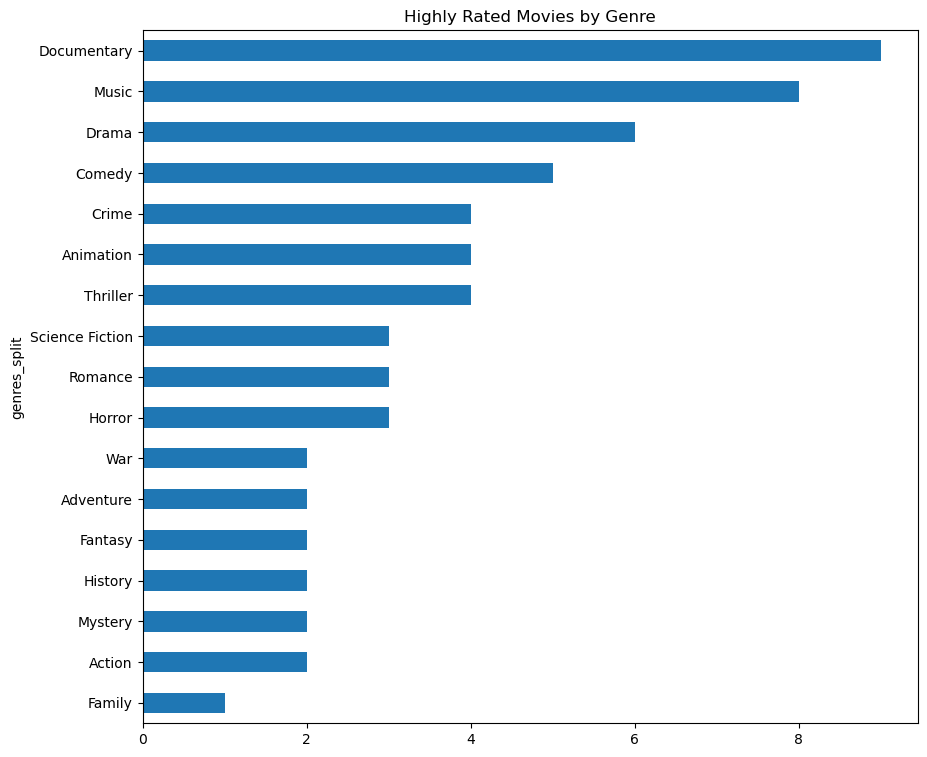

In [190]:
# Creates a bar chart to display the movies per genres with a rating of 8 or higher
genres_vote['vote_average'].plot.barh(title = 'Highly Rated Movies by Genre', figsize = (10, 9))

###  Research Hypotheses:
         The best movies according to vote avg. return the highest profit and revenue.

In [202]:
# creates a new dataframe to work with called 'movies_clean'
movies_clean = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]

# filters down to movies with at least 50 votes
movies_clean_fifty = movies_clean[movies_clean['vote_count'] >= 50]
movies_clean_fifty

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360
...,...,...,...,...,...,...,...,...,...,...
10821,0.929393,0,0,Fahrenheit 451,112,Drama|Science Fiction,1966,93,6.800000,0
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,1966,74,7.500000,26236689
10825,0.509263,0,0,Blow-Up,111,Drama|Mystery|Thriller,1966,103,6.800000,0
10827,0.410366,1377800,0,Batman,105,Family|Adventure|Comedy|Science Fiction|Crime,1966,99,5.900000,-1377800


In [203]:
# analyze correlation between the numeric columns of the table
movies_clean_fifty.corr(numeric_only = True, method = 'spearman')

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.070895,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,-0.019452,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,-0.108974,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,-0.131512,0.263164,0.286082,0.211947
release_year,0.070895,-0.019452,-0.108974,-0.131512,1.000000,0.149045,-0.153545,-0.099378
vote_count,0.768888,0.554412,0.682550,0.263164,0.149045,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,-0.153545,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,-0.099378,0.583606,0.198580,1.000000


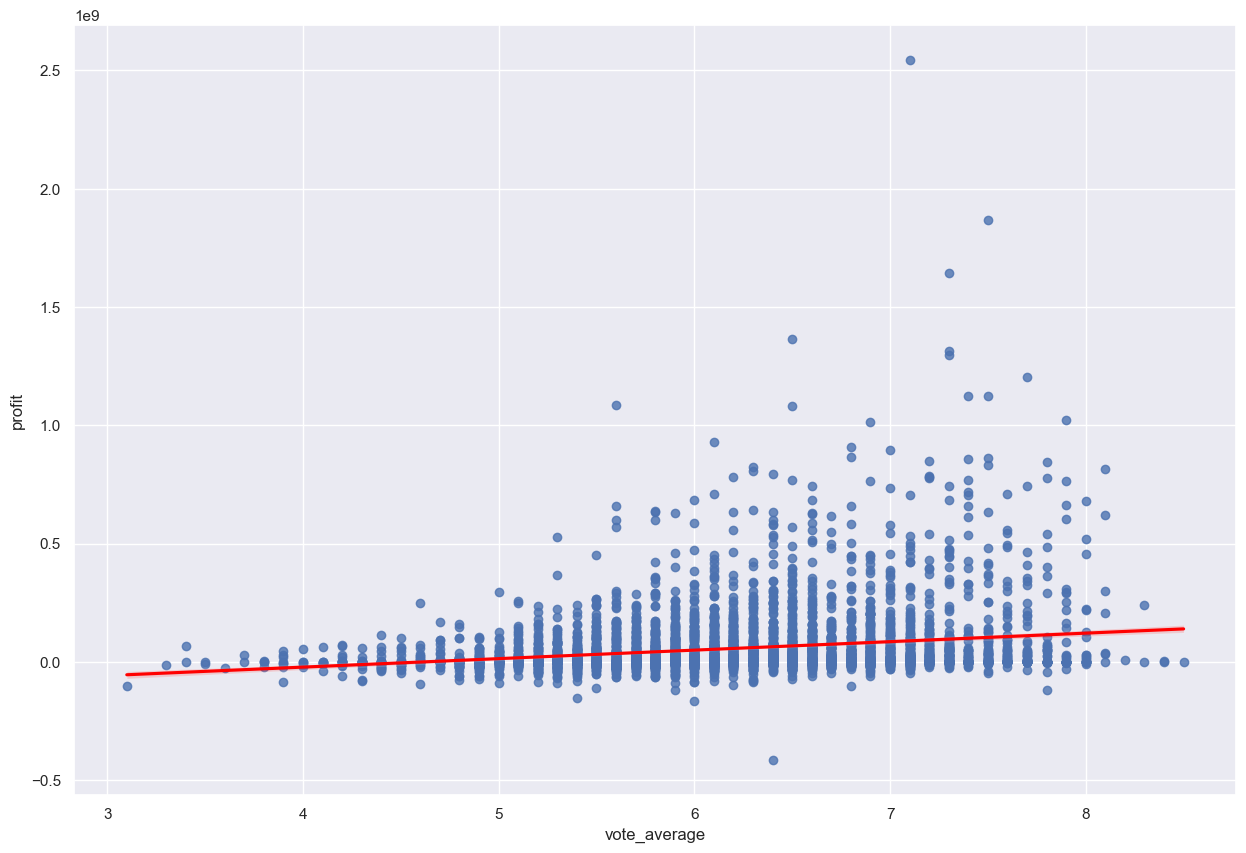

<Figure size 1000x900 with 0 Axes>

In [230]:
# visualizes the correlation between vote average and profit using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean_fifty, x = 'vote_average', y = 'profit', line_kws = {'color': 'red'})
plt.figure(figsize = (10, 9))
plt.show()

<Axes: xlabel='vote_average', ylabel='revenue'>

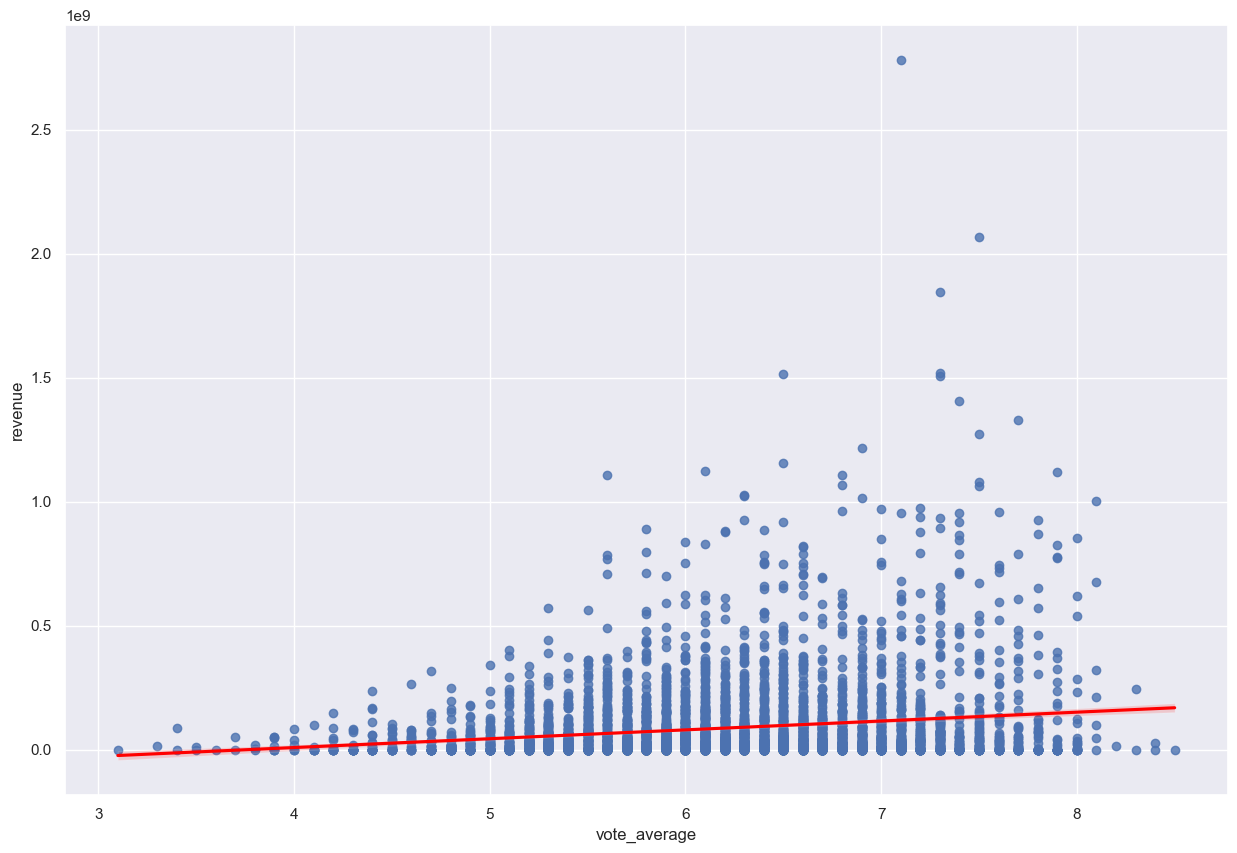

In [229]:
# visualizes the correlation between vote average and revenue using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean_fifty, x = 'vote_average', y = 'revenue', line_kws = {'color': 'red'})

###  Research Hypotheses:
         The best movies according to popularity return the highest profit and revenue.

<Axes: xlabel='popularity', ylabel='profit'>

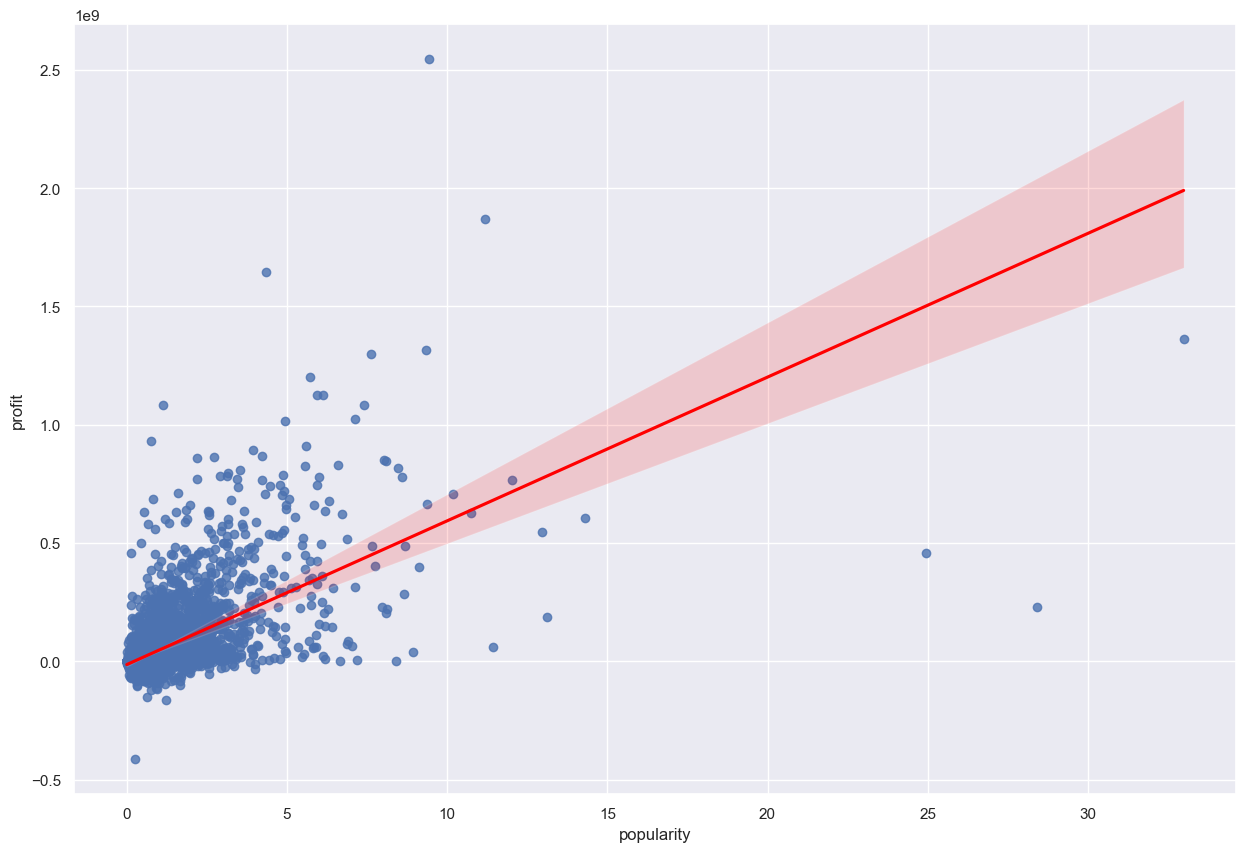

In [228]:
# visualizes the correlation between popularity and profit using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean, x = 'popularity', y = 'profit', line_kws = {'color': 'red'})

<Axes: xlabel='popularity', ylabel='revenue'>

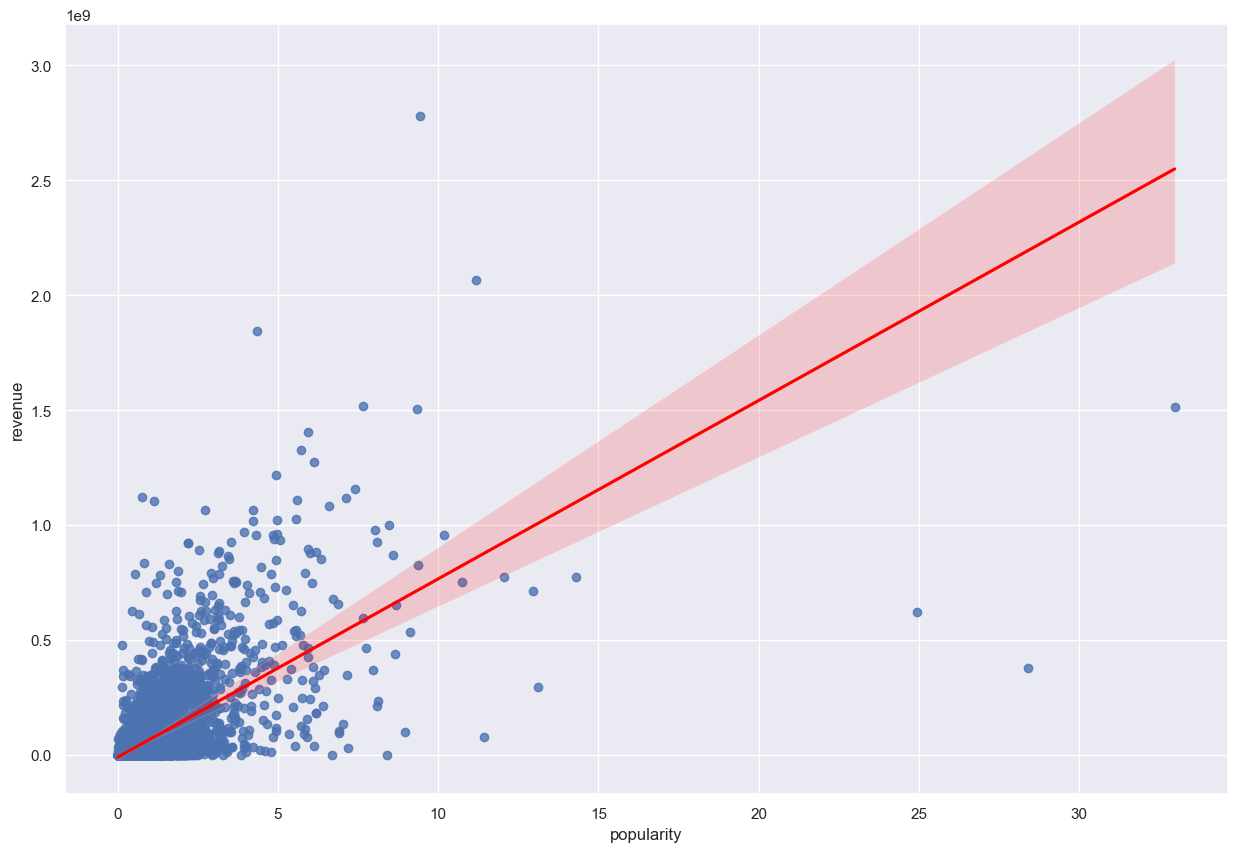

In [227]:
# visualizes the correlation between popularity and revenue using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean, x = 'popularity', y = 'revenue', line_kws = {'color': 'red'})

###  Research Hypotheses:
         Highly budgeted movies return high profit.

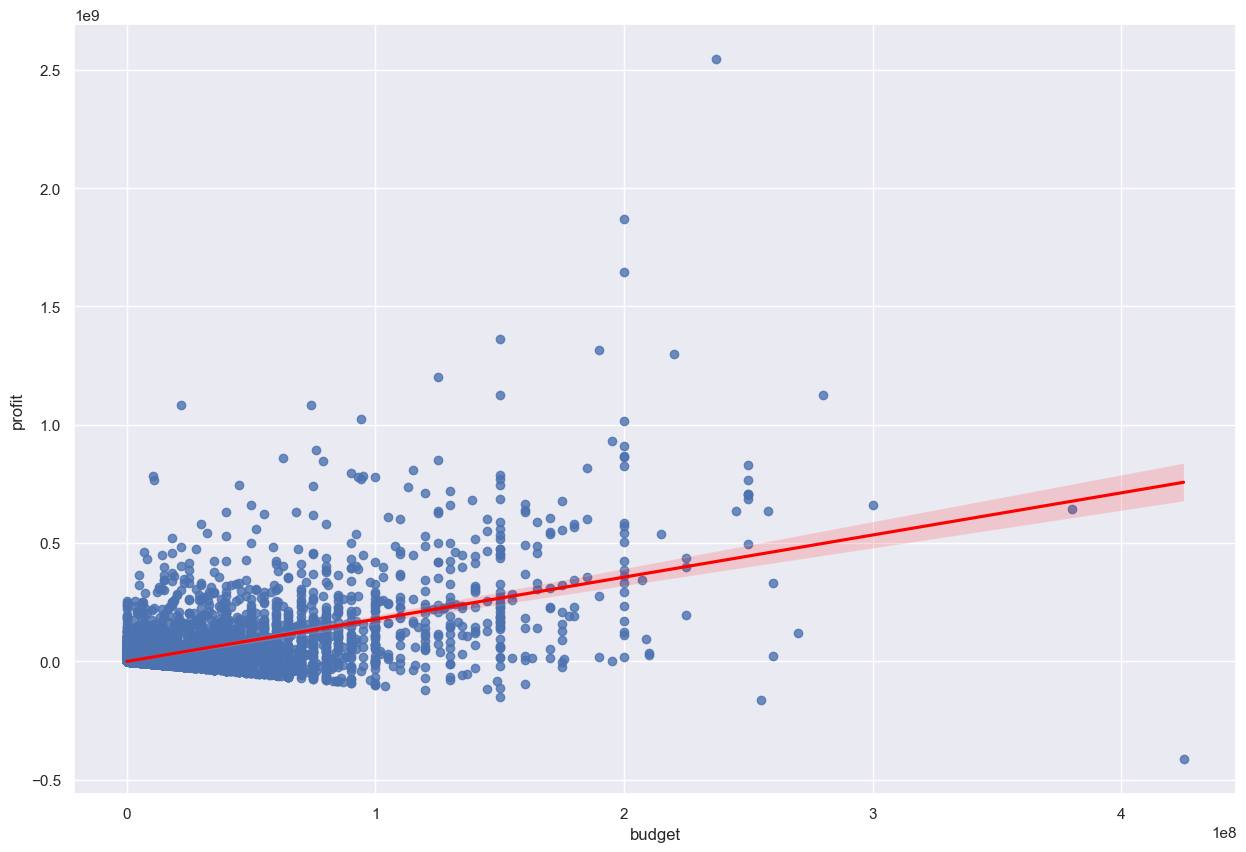

<Figure size 1000x900 with 0 Axes>

In [226]:
# visualizes the correlation between budget and profit using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean, x = 'budget', y = 'profit', line_kws = {'color': 'red'})
plt.figure(figsize = (10, 9))
plt.show()

###  Research Hypotheses:
         Highly budgeted movies have high popularity.

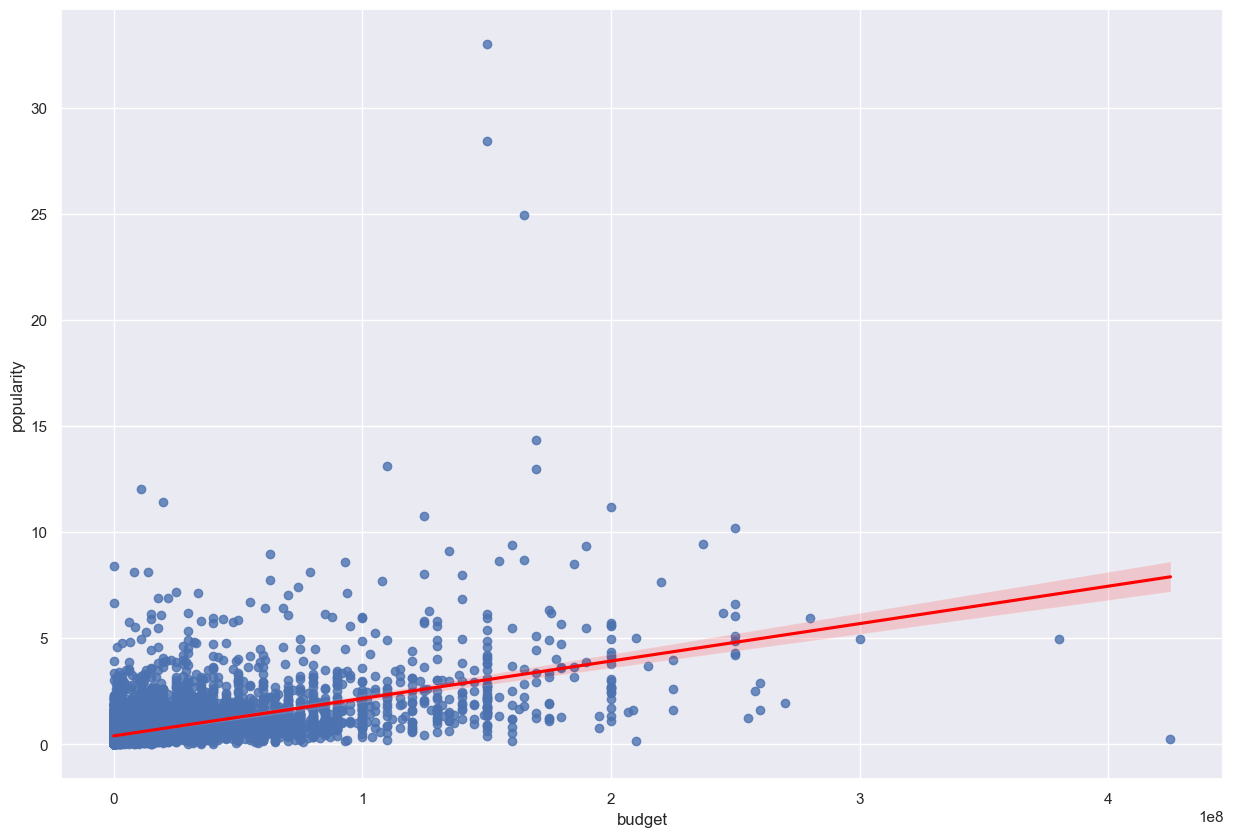

<Figure size 1000x900 with 0 Axes>

In [225]:
# visualizes the correlation between budget and profit using a regression scatter plot
sns.set(rc = {'figure.figsize': (15, 10)})
sns.regplot(data = movies_clean, x = 'budget', y = 'popularity', line_kws = {'color': 'red'})
plt.figure(figsize = (10, 9))
plt.show()

###  Research Hypotheses:
         Movies have made more profit over time (based on genre).

In [215]:
# call back to previously used dataframe
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [217]:
# creates a new dataframe that groups by year and genres, and calculates the average profit
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())
time_genre

profit
release_year genres_split                   
1960         Action           6363125.000000
             Adventure         431000.000000
             Comedy           5258750.000000
             Crime                  0.000000
             Drama            8245619.384615
...                                      ...
2015         Science Fiction 83321303.523256
             TV Movie         -150000.000000
             Thriller        32869106.847953
             War             54677314.333333
             Western         72856619.000000

[1049 rows x 1 columns]

In [219]:
# pivots the table to use the release years as columns
final_time_genre = pd.pivot_table(time_genre, values = 'profit', index = 'genres_split', columns = 'release_year')
final_time_genre

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,7735913.454545,24420144.181818,...,42614964.746667,32379154.185714,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,11406377.666667,19384323.600000,...,89132818.265306,70756754.320755,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,25837628.500000,-20000000.000000,...,88560400.304348,40307312.153846,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,11901488.583333,-2577777.777778,...,25465251.120000,22147617.440559,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,-2125000.000000,8963316.900000,...,24306880.000000,15680793.688889,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,...,12956893.583333,316012.705882,6772940.000000,5229344.631579,321262.230769,-1603933.560000,187417.771429,2567196.816327,1102306.591837,321880.225806,13104.136986,531061.859649
Drama,8245619.384615,4912698.375000,4373796.190476,1587307.692308,3726105.550000,11933809.800000,1014793.062500,18045095.000000,6354859.150000,10317995.538462,19753262.842105,5400277.666667,...,20139441.943262,17180823.510989,12994800.142132,13953425.421320,16736384.017167,15209056.888393,13510589.176190,10830976.523364,23418944.870690,13344942.608696,13697098.665493,16315310.438462
Family,3333333.333333,42576002.800000,4000000.000000,-333333.333333,37818181.750000,51671428.666667,-341828.571429,64281204.000000,-640000.000000,0.000000,17225085.666667,-9500000.000000,...,67201106.100000,51714774.929825,35281751.276923,80470561.733333,44483026.142857,62009322.100000,98999767.490909,65483435.472222,69321493.023810,89321956.437500,56295182.744186,85974520.750000
Fantasy,-375000.000000,0.000000,-126.000000,-500000.000000,24068181.750000,NaN,0.000000,-3000000.000000,-2000000.000000,0.000000,0.000000,-9500000.000000,...,135199986.315789,64388182.000000,57967661.441176,93461583.425532,51441997.767442,96235822.102041,83235328.522727,94486677.847826,122245621.970588,79363628.000000,112966482.638889,86576948.303030


Text(0.5, 1.0, 'Profit by Genres and Year')

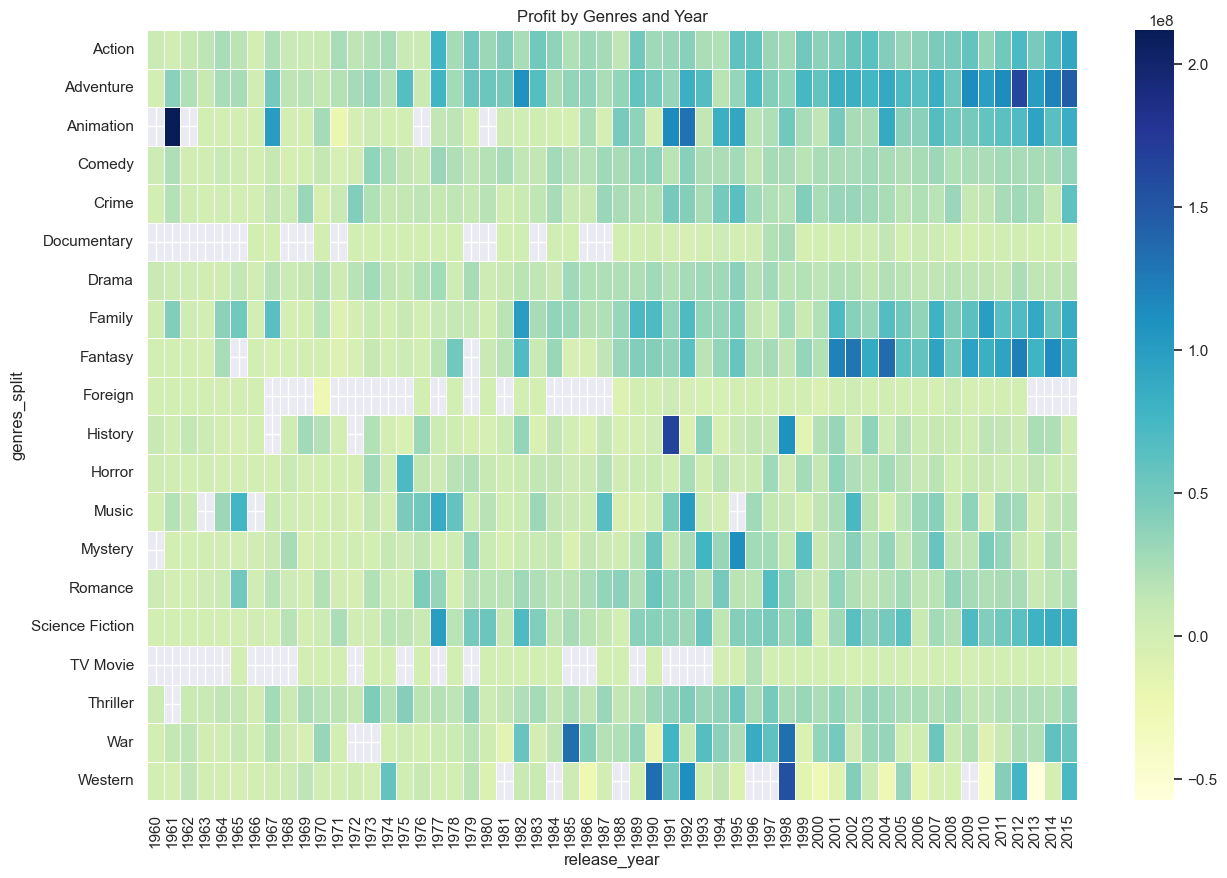

In [224]:
# create a heatmap to visualize the profit over time
sns.set(rc = {'figure.figsize': (15, 10)})
sns.heatmap(final_time_genre, cmap = 'YlGnBu', linewidth = .5)
plt.title('Profit by Genres and Year')